In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
from tensorflow import keras 

2023-10-25 18:45:23.824546: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
import pathlib
data_dir='../Dataset/PlantVillage_potato'
test_dir='../Dataset/potato_test/'
data_dir=pathlib.Path(data_dir)
test_dir=pathlib.Path(test_dir)
data_dir

PosixPath('../Dataset/PlantVillage_potato')

In [4]:
os.listdir(data_dir)

['Potato___Late_blight', 'Potato___Early_blight', 'Potato___healthy']

In [5]:
image_count=len(list(data_dir.glob('*/*.JPG')))
image_count

2152

In [6]:
early_blight=list(data_dir.glob('Potato___Early_blight/*'))
early_blight[:5]

[PosixPath('../Dataset/PlantVillage_potato/Potato___Early_blight/fd59ab68-681f-4aca-ae95-6f73bf8caad7___RS_Early.B 7118.JPG'),
 PosixPath('../Dataset/PlantVillage_potato/Potato___Early_blight/be89d35f-e382-4b1c-95e8-af88d969d306___RS_Early.B 6758.JPG'),
 PosixPath('../Dataset/PlantVillage_potato/Potato___Early_blight/c17c36ed-c36f-42d4-812d-3b17158063d3___RS_Early.B 8398.JPG'),
 PosixPath('../Dataset/PlantVillage_potato/Potato___Early_blight/26f15c9c-5cbf-49c8-ac4e-c5b15d03e319___RS_Early.B 9022.JPG'),
 PosixPath('../Dataset/PlantVillage_potato/Potato___Early_blight/10a3920b-dd04-406d-8bbd-f92f221e4dee___RS_Early.B 7035.JPG')]

In [7]:
k=PIL.Image.open(str(early_blight[2]))

In [8]:
potato_disease_dict={
    'early_blight':list(data_dir.glob('Potato___Early_blight/*')),
    'late_blight':list(data_dir.glob('Potato___Late_blight/*')),
    'healthy':list(data_dir.glob('Potato___healthy/*'))
}

In [9]:
potato_disease_test_dict={
    'early_blight':list(test_dir.glob('potato_early/*')),
    'late_blight':list(test_dir.glob('potato_late/*')),
    'healthy':list(test_dir.glob('potato_healthy/*'))
}

In [10]:
potato_disease_test_dict

{'early_blight': [PosixPath('../Dataset/potato_test/potato_early/potato_early_1120_gblr_3.JPG'),
  PosixPath('../Dataset/potato_test/potato_early/potato_early_736.JPG'),
  PosixPath('../Dataset/potato_test/potato_early/potato_early_683.JPG'),
  PosixPath('../Dataset/potato_test/potato_early/potato_early_235.JPG'),
  PosixPath('../Dataset/potato_test/potato_early/potato_early_1050_gblr_4.JPG'),
  PosixPath('../Dataset/potato_test/potato_early/potato_early_1120_ccrp_4.JPG'),
  PosixPath('../Dataset/potato_test/potato_early/potato_early_1020_ccrp_2.JPG'),
  PosixPath('../Dataset/potato_test/potato_early/potato_early_329.JPG'),
  PosixPath('../Dataset/potato_test/potato_early/potato_early_1121_ccrp_4.JPG'),
  PosixPath('../Dataset/potato_test/potato_early/potato_early_1151_ccrp_4.JPG'),
  PosixPath('../Dataset/potato_test/potato_early/potato_early_1118_gblr_3.JPG'),
  PosixPath('../Dataset/potato_test/potato_early/potato_early_1148_ccrp_4.JPG'),
  PosixPath('../Dataset/potato_test/potato_e

In [11]:
potato_lablels_dict={
    'early_blight':0,
    'late_blight':1,
    'healthy':2,
    
}

In [12]:
potato_lablels_dict

{'early_blight': 0, 'late_blight': 1, 'healthy': 2}

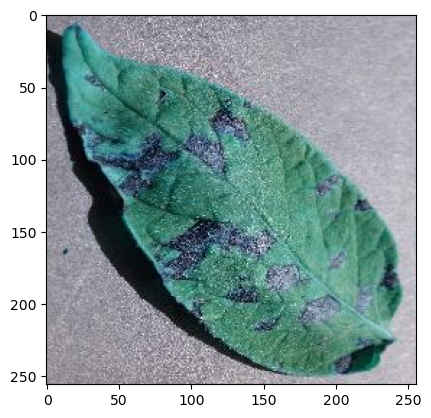

In [12]:
import random
img1=str(potato_disease_dict['early_blight'][random.randint(0,1000)])
img1=cv2.imread(img1)
plt.imshow(img1)

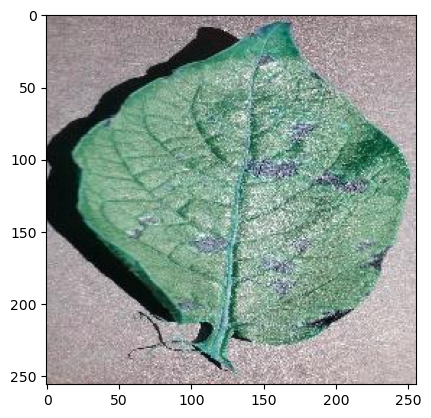

In [13]:
img2=str(potato_disease_test_dict['early_blight'][random.randint(0,1000)])
img2=cv2.imread(img2)
plt.imshow(img2)

In [13]:
X,y=[],[]
X_test,y_test=[],[]
for disease_name, images in potato_disease_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(potato_lablels_dict[disease_name])

for disease_name, images in potato_disease_test_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,(224,224))
        X_test.append(resized_img)
        y_test.append(potato_lablels_dict[disease_name])

In [14]:
img_height,img_width=X[0].shape[:2]

In [15]:
X[0].shape

(224, 224, 3)

In [16]:
X=np.array(X)
y=np.array(y)

X_test=np.array(X_test)
y_test=np.array(y_test)


from sklearn.utils import shuffle
X_test, y_test = shuffle(X_test, y_test, random_state=42)


In [17]:
y_test[:10]

array([1, 2, 1, 0, 2, 1, 2, 2, 0, 1])

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid=train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=42,shuffle=True)

In [19]:
print(len(X_train))
print(len(X_valid))
print(len(y_train))
print(len(y_valid))

1721
431
1721
431


In [20]:
X_train_scaled=X_train/255
X_valid_scaled=X_valid/255
X_test_scaled=X_test/255

In [22]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
num_classes=5
augmented_model=Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=X[0].shape),
    layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomContrast(0.5),
    layers.experimental.preprocessing.RandomFlip(),    
])


2023-10-25 18:40:39.622596: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


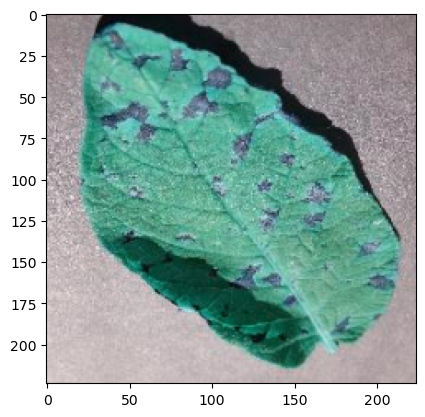

In [23]:
import matplotlib.pyplot as plt
plt.imshow(X[0])

In [24]:
#plt.imshow(augmented_model(X)[0].numpy().astype("uint8"))

In [25]:
num_classes=5
model=Sequential([
    augmented_model,
    layers.Conv2D(32,3, padding='same', input_shape=X[0].shape, activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes,activation='softmax')
])

In [26]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics=['accuracy'])

In [27]:
from keras.callbacks import EarlyStopping
es=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5,restore_best_weights=True,start_from_epoch=5)

In [33]:
history=model.fit(X_train_scaled,y_train,
          validation_data=(X_valid_scaled,y_valid),
          batch_size=64,
          epochs=50,
          callbacks=[es]
         )

Epoch 1/50
27/27 [==============================] - 90s 3s/step - loss: 1.0587 - accuracy: 0.4631 - val_loss: 0.9583 - val_accuracy: 0.4548
Epoch 2/50
27/27 [==============================] - 89s 3s/step - loss: 0.8588 - accuracy: 0.5689 - val_loss: 0.7330 - val_accuracy: 0.7958
Epoch 3/50
27/27 [==============================] - 82s 3s/step - loss: 0.6688 - accuracy: 0.7443 - val_loss: 1.0666 - val_accuracy: 0.3944
Epoch 4/50
27/27 [==============================] - 82s 3s/step - loss: 0.5252 - accuracy: 0.8030 - val_loss: 0.4283 - val_accuracy: 0.8515
Epoch 5/50
27/27 [==============================] - 85s 3s/step - loss: 0.3833 - accuracy: 0.8466 - val_loss: 0.3360 - val_accuracy: 0.8585
Epoch 6/50
27/27 [==============================] - 81s 3s/step - loss: 0.3764 - accuracy: 0.8489 - val_loss: 0.2786 - val_accuracy: 0.9165
Epoch 7/50
27/27 [==============================] - 83s 3s/step - loss: 0.3270 - accuracy: 0.8623 - val_loss: 0.3704 - val_accuracy: 0.8492
Epoch 8/50
27/27 [==

In [34]:
model.save('../models/saved_models/1/PLIDD_model1.pb')

2023-10-25 18:34:16.239499: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'random_flip_input' with dtype float and shape [?,224,224,3]
	 [[{{node random_flip_input}}]]
2023-10-25 18:34:16.497955: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,224,224,3]
	 [[{{node inputs}}]]
2023-10-25 18:34:16.526135: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'random_flip_input' with dtype float and shape [

INFO:tensorflow:Assets written to: ../models/saved_models/1/PLIDD_model1.pb/assets


INFO:tensorflow:Assets written to: ../models/saved_models/1/PLIDD_model1.pb/assets


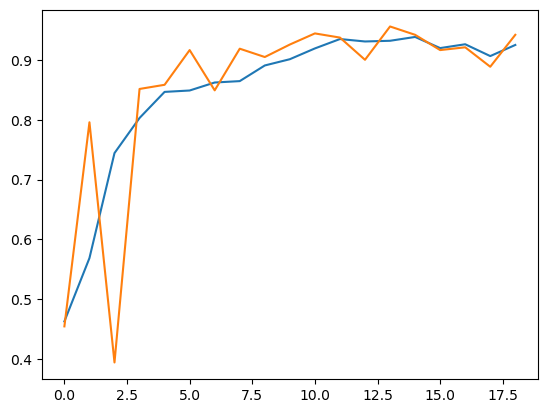

In [35]:
plt.plot(history.epoch,history.history["accuracy"])
plt.plot(history.epoch,history.history["val_accuracy"])
plt.show()

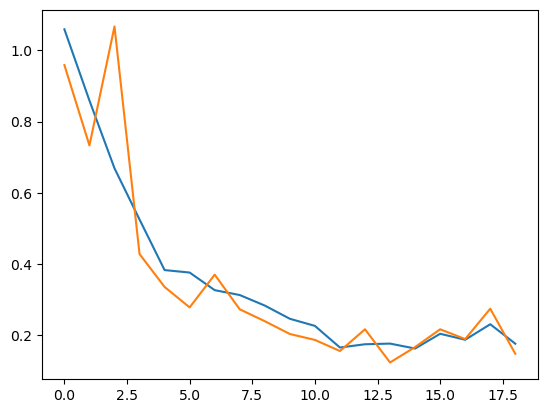

In [36]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show()

In [23]:
model=keras.models.load_model('../models/saved_models/1/PLIDD_model1.pb')

2023-10-25 18:46:15.749383: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [24]:
import gc
gc.collect()

2665

In [25]:
model.evaluate(X_valid_scaled,y_valid)

14/14 [==============================] - 5s 338ms/step - loss: 0.1241 - accuracy: 0.9559


[0.12412010878324509, 0.9559164643287659]

In [26]:
gc.collect()

597

In [27]:
#test_evaluation=model.evaluate(X_test_scaled,y_test)

In [28]:
#predictions=[np.argmax(model.predict(np.array([X_test_scaled[i]])))==y_test[i] for i in range(len(X_test_scaled))]

In [1]:
predictions=model.predict(X_test_scaled)

NameError: name 'model' is not defined

In [ ]:
predictions2=[np.argmax(predictions[i]) for i in range(len(X_test_scaled))]
predictions3=[np.argmax(predictions[i])==y_test[i] for i in range(len(X_test_scaled))]

In [35]:
np.argmax(model.predict(np.array([X_test_scaled[4]])))

1/1 [==============================] - 0s 23ms/step


2

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score
cf=confusion_matrix(predictions2,y_test)

In [37]:
cf

array([[2109,  152,   90],
       [ 110, 2049,  258],
       [   0,   18, 1702]])

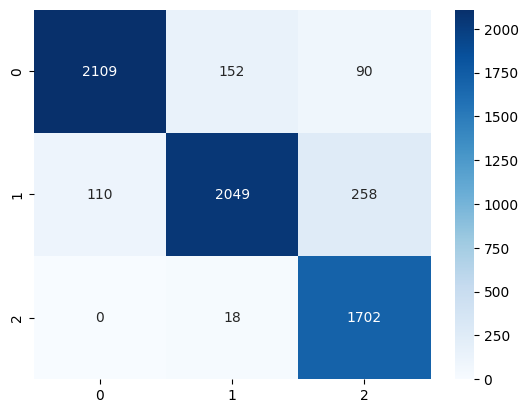

In [38]:
import seaborn as sb
sb.heatmap(cf, annot=True,fmt='', cmap='Blues');

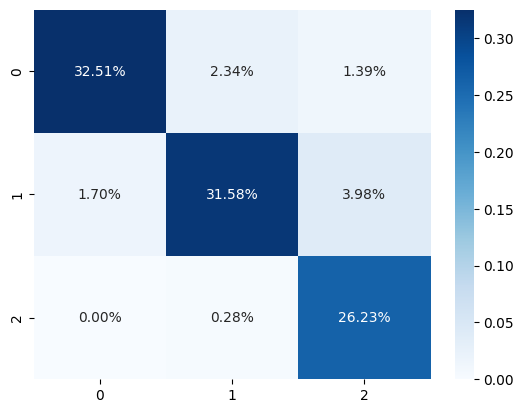

In [39]:
import seaborn as sb
sb.heatmap(cf/np.sum(cf), annot=True,fmt='.2%', cmap='Blues');

In [33]:
import tensorflow_hub as hub

In [34]:
pre_trained_model= tf.keras.Sequential(
    [
        hub.KerasLayer("https://tfhub.dev/rishit-dagli/plant-disease/1",input_shape=(224,224,3),trainable=False)
    ]
)

In [35]:
TL_model=keras.Sequential([
    pre_trained_model,
    keras.layers.Dense(3)
])
TL_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 38)                3267814   
                                                                 
 dense_2 (Dense)             (None, 3)                 117       
                                                                 
Total params: 3267931 (12.47 MB)
Trainable params: 117 (468.00 Byte)
Non-trainable params: 3267814 (12.47 MB)
_________________________________________________________________


In [36]:
TL_model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics=['accuracy'])

In [37]:
history=TL_model.fit(X_train_scaled,y_train,
          validation_data=(X_valid_scaled,y_valid),
          batch_size=64,
          epochs=50,
          callbacks=[es]
         )

Epoch 1/50


2023-09-29 22:46:28.996903: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1036234752 exceeds 10% of free system memory.


27/27 [==============================] - 32s 1s/step - loss: 3.5995 - accuracy: 0.4898 - val_loss: 3.5633 - val_accuracy: 0.5592
Epoch 2/50
27/27 [==============================] - 29s 1s/step - loss: 3.1580 - accuracy: 0.5828 - val_loss: 3.3059 - val_accuracy: 0.5963
Epoch 3/50
27/27 [==============================] - 29s 1s/step - loss: 2.9296 - accuracy: 0.5671 - val_loss: 3.0312 - val_accuracy: 0.5777
Epoch 4/50
27/27 [==============================] - 30s 1s/step - loss: 2.6222 - accuracy: 0.5782 - val_loss: 2.7274 - val_accuracy: 0.5893
Epoch 5/50
27/27 [==============================] - 29s 1s/step - loss: 2.3052 - accuracy: 0.6014 - val_loss: 2.3462 - val_accuracy: 0.6079
Epoch 6/50
27/27 [==============================] - 29s 1s/step - loss: 1.9602 - accuracy: 0.6084 - val_loss: 1.9940 - val_accuracy: 0.6148
Epoch 7/50
27/27 [==============================] - 29s 1s/step - loss: 1.6062 - accuracy: 0.6246 - val_loss: 1.8174 - val_accuracy: 0.6172
Epoch 8/50
27/27 [=============